In [1]:
pwd

'g:\\backup'

In [2]:
import os
os.chdir(r"G:\Fruits and Vegitables")
for root,dir,files in os.walk("."):
    for file in files:
        print(file)

my_model.keras
Image_1.jpg
Image_10.jpg
Image_2.jpg
Image_3.jpg
Image_4.jpg
Image_5.jpg
Image_6.JPG
Image_7.jpg
Image_8.jpg
Image_9.jpg
Image_1.jpg
Image_10.jpg
Image_2.jpg
Image_3.jpg
Image_4.jpg
Image_5.jpg
Image_6.jpg
Image_8.jpg
Image_9.jpg
Image_1.jpg
Image_10.jpg
Image_2.jpg
Image_3.jpg
Image_4.jpg
Image_5.jpg
Image_6.jpg
Image_7.jpg
Image_8.jpg
Image_9.jpg
Image_1.jpg
Image_10.jpg
Image_2.jpg
Image_3.jpeg
Image_4.jpg
Image_5.jpg
Image_6.jpg
Image_7.jpg
Image_8.jpg
Image_9.jpg
Image_1.jpg
Image_10.jpg
Image_2.jpg
Image_3.jpg
Image_4.jpg
Image_5.jpg
Image_6.jpg
Image_7.jpg
Image_8.jpg
Image_9.jpg
Image_1.jpg
Image_10.jpg
Image_2.jpg
Image_3.JPG
Image_4.jpg
Image_5.jpg
Image_6.jpg
Image_7.jpg
Image_8.jpg
Image_9.jpg
Image_1.jpg
Image_10.jpg
Image_2.jpg
Image_3.jpg
Image_4.png
Image_5.jpg
Image_6.jpg
Image_7.JPG
Image_8.jpg
Image_9.jpeg
Image_1.jpg
Image_10.jpg
Image_2.jpg
Image_3.jpg
Image_4.jpg
Image_5.JPG
Image_6.jpg
Image_7.jpg
Image_8.jpg
Image_9.jpg
Image_1.jpg
Image_10.jpg
Im

In [3]:
from pathlib import Path
train_dir = Path(r'G:\Fruits and Vegitables\archive\train')
train_filepaths = list(train_dir.glob(r'**/*.jpg'))

In [4]:
test_dir = Path(r'G:\Fruits and Vegitables\archive\test')
test_filepaths = list(test_dir.glob(r'**/*.jpg'))

In [5]:
val_dir = Path(r'G:\Fruits and Vegitables\archive\validation')
val_filepaths = list(test_dir.glob(r'**/*.jpg'))

In [6]:
def image_processing(filepath):
    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')
    df = pd.concat([filepath, labels], axis=1)
    df = df.sample(frac=1).reset_index(drop = True)
    return df

In [7]:
import pandas as pd
def image_processing(filepath):
    if not filepath:
        raise ValueError("The filepath list is empty. Please check the file paths.")

    labels = [str(filepath[i]).split("\\")[-2] for i in range(len(filepath))]
    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')
    return pd.concat([filepath, labels], axis=1)

In [8]:
train_df = image_processing(train_filepaths)
test_df = image_processing(test_filepaths)
val_df = image_processing(val_filepaths)

In [9]:
print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

-- Training set --

Number of pictures: 2855

Number of different labels: 36

Labels: ['apple' 'banana' 'beetroot' 'bell pepper' 'cabbage' 'capsicum' 'carrot'
 'cauliflower' 'chilli pepper' 'corn' 'cucumber' 'eggplant' 'garlic'
 'ginger' 'grapes' 'jalepeno' 'kiwi' 'lemon' 'lettuce' 'mango' 'onion'
 'orange' 'paprika' 'pear' 'peas' 'pineapple' 'pomegranate' 'potato'
 'raddish' 'soy beans' 'spinach' 'sweetcorn' 'sweetpotato' 'tomato'
 'turnip' 'watermelon']


In [10]:
train_df.head(10)

,Filepath,Label
0,G:\Fruits and Vegitables\archive\train\apple\I...,apple
1,G:\Fruits and Vegitables\archive\train\apple\I...,apple
2,G:\Fruits and Vegitables\archive\train\apple\I...,apple
3,G:\Fruits and Vegitables\archive\train\apple\I...,apple
4,G:\Fruits and Vegitables\archive\train\apple\I...,apple
5,G:\Fruits and Vegitables\archive\train\apple\I...,apple
6,G:\Fruits and Vegitables\archive\train\apple\I...,apple
7,G:\Fruits and Vegitables\archive\train\apple\I...,apple
8,G:\Fruits and Vegitables\archive\train\apple\I...,apple
9,G:\Fruits and Vegitables\archive\train\apple\I...,apple


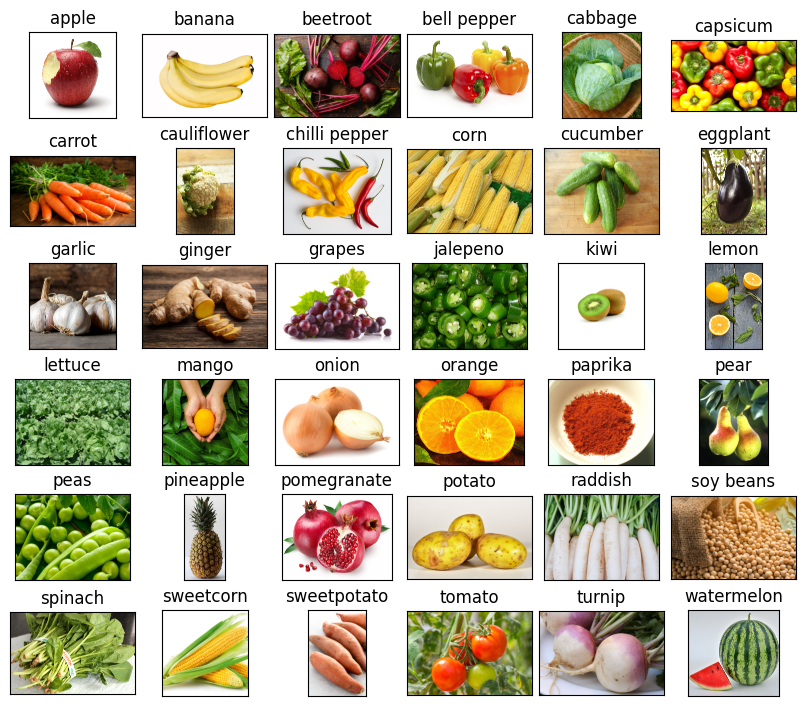

In [11]:
import matplotlib.pyplot as plt
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})
num_images = len(df_unique)

for i, ax in enumerate(axes.flat):
    if i >= num_images:
        break
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize=12)

plt.tight_layout(pad=0.5)
plt.show()

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,img_to_array
print(tf.__version__)
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

2.17.0


In [13]:
print(train_df.columns)
print(train_df['Label'])

Index(['Filepath', 'Label'], dtype='object')
0            apple
1            apple
2            apple
3            apple
4            apple
           ...    
2850    watermelon
2851    watermelon
2852    watermelon
2853    watermelon
2854    watermelon
Name: Label, Length: 2855, dtype: object


In [14]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    directory='/path/to/images',  # Provide the directory if needed
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 2855 validated image filenames belonging to 36 classes.


In [15]:
val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 340 validated image filenames belonging to 36 classes.


In [16]:
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 340 validated image filenames belonging to 36 classes.


In [17]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'    
)
pretrained_model.trainable = False

In [18]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(36, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

c:\Users\JayaPrakash\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 335s 4s/step - accuracy: 0.3341 - loss: 2.6364 - val_accuracy: 0.8441 - val_loss: 0.5371
Epoch 2/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 177s 2s/step - accuracy: 0.7979 - loss: 0.6372 - val_accuracy: 0.9147 - val_loss: 0.3405
Epoch 3/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 167s 2s/step - accuracy: 0.8883 - loss: 0.3703 - val_accuracy: 0.9235 - val_loss: 0.2691
Epoch 4/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 168s 2s/step - accuracy: 0.9247 - loss: 0.2385 - val_accuracy: 0.9588 - val_loss: 0.1994
Epoch 5/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 183s 2s/step - accuracy: 0.9586 - loss: 0.1460 - val_accuracy: 0.9618 - val_loss: 0.1874


In [19]:
import numpy as np
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)
# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred1 = [labels[k] for k in pred]
pred1

11/11 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step


['apple',
 'apple',
 'apple',
 'apple',
 'ginger',
 'chilli pepper',
 'apple',
 'apple',
 'apple',
 'apple',
 'banana',
 'banana',
 'raddish',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'lemon',
 'beetroot',
 'beetroot',
 'beetroot',
 'beetroot',
 'beetroot',
 'beetroot',
 'beetroot',
 'beetroot',
 'beetroot',
 'beetroot',
 'bell pepper',
 'bell pepper',
 'bell pepper',
 'bell pepper',
 'bell pepper',
 'bell pepper',
 'capsicum',
 'bell pepper',
 'bell pepper',
 'cabbage',
 'cabbage',
 'cabbage',
 'cabbage',
 'cabbage',
 'cabbage',
 'cabbage',
 'cabbage',
 'cabbage',
 'cabbage',
 'capsicum',
 'capsicum',
 'capsicum',
 'capsicum',
 'capsicum',
 'capsicum',
 'capsicum',
 'capsicum',
 'capsicum',
 'capsicum',
 'carrot',
 'carrot',
 'carrot',
 'carrot',
 'carrot',
 'carrot',
 'carrot',
 'carrot',
 'cauliflower',
 'cauliflower',
 'cauliflower',
 'cauliflower',
 'cauliflower',
 'cauliflower',
 'cauliflower',
 'cauliflower',
 'cauliflower',
 'cauliflower',
 'chilli pepper',
 'chi

In [20]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = labels[y]
    return res

In [21]:
pwd

'G:\\Fruits and Vegitables'

In [22]:
model.save('my_model.keras')